In [14]:
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt

In [30]:
my_en = tf.keras.models.load_model(os.path.join("saved_models", "my_en"))
my_xc = tf.keras.models.load_model(os.path.join("models", "best_xc.h5"))
my_vgg = tf.keras.models.load_model(os.path.join("models", "best_vgg.h5"))

In [36]:
my_en.summary()

Model: "EfficientNetV2-S"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-s (Functiona  (None, 7, 7, 1280)       20331360  
 l)                                                              
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 500)         640500    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 500)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 500)    

In [7]:
dataset_test = tf.keras.utils.image_dataset_from_directory(
        os.path.join("data", "test"),
        labels="inferred",
        label_mode="binary", # 0: fake, 1:real
        image_size=(224, 224),
        batch_size=32
    )
dataset_test_celeb = tf.keras.utils.image_dataset_from_directory(
        os.path.join("data", "test_celeb"),
        labels="inferred",
        label_mode="binary", # 0: fake, 1:real
        image_size=(224, 224),
        batch_size=32
    )
dataset_test_dfdc = tf.keras.utils.image_dataset_from_directory(
        os.path.join("data", "test_dfdc"),
        labels="inferred",
        label_mode="binary", # 0: fake, 1:real
        image_size=(224, 224),
        batch_size=32
    )
dataset_test_ff = tf.keras.utils.image_dataset_from_directory(
        os.path.join("data", "test_ff"),
        labels="inferred",
        label_mode="binary", # 0: fake, 1:real
        image_size=(224, 224),
        batch_size=32
    )


Found 8210 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 727 files belonging to 2 classes.
Found 945 files belonging to 2 classes.


In [33]:
dataset_test_xc = tf.keras.utils.image_dataset_from_directory(
        os.path.join("data", "test"),
        labels="inferred",
        label_mode="binary", # 0: fake, 1:real
        image_size=(229, 229),
        batch_size=32
    )
dataset_test_celeb_xc = tf.keras.utils.image_dataset_from_directory(
        os.path.join("data", "test_celeb"),
        labels="inferred",
        label_mode="binary", # 0: fake, 1:real
        image_size=(229, 229),
        batch_size=32
    )
dataset_test_dfdc_xc = tf.keras.utils.image_dataset_from_directory(
        os.path.join("data", "test_dfdc"),
        labels="inferred",
        label_mode="binary", # 0: fake, 1:real
        image_size=(229, 229),
        batch_size=32
    )
dataset_test_ff_xc = tf.keras.utils.image_dataset_from_directory(
        os.path.join("data", "test_ff"),
        labels="inferred",
        label_mode="binary", # 0: fake, 1:real
        image_size=(229, 229),
        batch_size=32
    )

Found 8210 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 727 files belonging to 2 classes.
Found 945 files belonging to 2 classes.


In [ ]:
# Erstes Element des Datasets erhalten
first_element = dataset_test.take(1)

# Das erste Element iterieren und anzeigen
for image, label in first_element:
    # image enthält das Bild und label enthält das Label des ersten Elements
    print('Bild:', image)
    print('Label:', label)

In [13]:
predictions = my_en.predict(dataset_test.take(1))

# Die Vorhersagen anzeigen
for prediction in predictions:
    print('Vorhersage:', prediction)

1/1 [==============================] - 1s 1s/step
Vorhersage: [-11.443169]
Vorhersage: [-11.853359]
Vorhersage: [17.938257]
Vorhersage: [-33.148968]
Vorhersage: [23.67745]
Vorhersage: [-19.378233]
Vorhersage: [-32.45258]
Vorhersage: [-15.873686]
Vorhersage: [-11.706943]
Vorhersage: [11.596937]
Vorhersage: [-31.287363]
Vorhersage: [20.166376]
Vorhersage: [-16.01003]
Vorhersage: [3.9566865]
Vorhersage: [16.809175]
Vorhersage: [-12.780462]
Vorhersage: [-13.043705]
Vorhersage: [6.3034143]
Vorhersage: [11.660805]
Vorhersage: [14.586955]
Vorhersage: [-7.881874]
Vorhersage: [-12.570187]
Vorhersage: [-20.739511]
Vorhersage: [11.235776]
Vorhersage: [19.375938]
Vorhersage: [17.642996]
Vorhersage: [-23.285131]
Vorhersage: [8.103008]
Vorhersage: [-11.516197]
Vorhersage: [18.81588]
Vorhersage: [18.099068]
Vorhersage: [13.204553]


Predictions:
 [1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1]
Labels:
 [1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 1.]


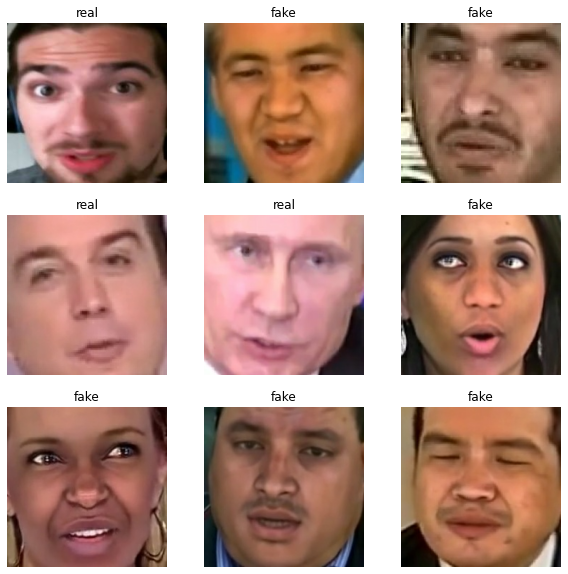

In [22]:
# Retrieve a batch of images from the test set
image_batch, label_batch = dataset_test.as_numpy_iterator().next()
predictions = my_en.predict_on_batch(image_batch).flatten()
class_names = ["fake", "real"]

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch.flatten())

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [37]:
my_en.evaluate(dataset_test)

257/257 [==============================] - 331s 1s/step - loss: 0.0700 - accuracy: 0.9862


[0.07002391666173935, 0.9862362742424011]

In [39]:
my_en.evaluate(dataset_test_celeb)

32/32 [==============================] - 39s 1s/step - loss: 5.0059 - accuracy: 0.5010


[5.005893230438232, 0.5009999871253967]

In [41]:
my_en.evaluate(dataset_test_ff)

30/30 [==============================] - 37s 1s/step - loss: 4.6674 - accuracy: 0.4878


[4.667412281036377, 0.4878306984901428]

In [42]:
my_en.evaluate(dataset_test_dfdc)

23/23 [==============================] - 29s 1s/step - loss: 2.4874 - accuracy: 0.5227


[2.487367630004883, 0.5226960182189941]

XC

In [34]:
my_xc.evaluate(dataset_test_ff_xc)

30/30 [==============================] - 33s 1s/step - loss: 2.0372 - accuracy: 0.5206


[2.037151336669922, 0.5206349492073059]